<center>
<h1>InShaDe: Invariant Shape Descriptors for visual analysis of histology 2D cellular and nuclear shapes</h1>
<h3><a href="mailto:magus@hbku.edu.qa">Marco&nbsp;Agus</a><sup>1</sup>&nbsp;&nbsp; 
Khaled&nbsp;Al-Thelaya<sup>1</sup>&nbsp;&nbsp; 
Corrado&nbsp;Cal&igrave;<sup>2</sup>&nbsp;&nbsp; 
Marina&nbsp;M.&nbsp;Boido<sup>2</sup>&nbsp;&nbsp; 
Yin&nbsp;Yang<sup>1</sup>&nbsp;&nbsp; 
Giovanni&nbsp;Pintore<sup>3</sup>&nbsp;&nbsp; 
Enrico&nbsp;Gobetti<sup>3</sup>&nbsp;&nbsp; 
<a href="mailto:jeschneider@hbku.edu.qa">Jens&nbsp;Schneider</a><sup>1</sup>&nbsp;&nbsp;</h3><br/>

<sup>1&nbsp;</sup>College of Science and Engineering, Hamad Bin Khalifa University, Qatar<br/>
<sup>2&nbsp;</sup>NICO, University of Turin, Italy<br/>
<sup>3&nbsp;</sup>Visual Computing, CRS4, Italy
</center><br/>

<img src="https://drive.google.com/uc?export=view&id=13bNpMV9-iGreXGgdOrUfbqXnQA_JKnP4"  align="center" alt="InShaDe Pipeline Overview" />
<p align="justify">
Figure 1: <b>InShaDe:</b> from cell contours extracted from digital histology images, our pipeline computes invariant energy curvature-based Fourier descriptors. These synthetic descriptors can be used for visual analysis, proof-reading, segmentation, and domain-specific clustering according to specific taxonomies.</p>
<hr/>
<h2>Copyright Notice</h2>
<p align="justify">This software is <b>(c) 2020 by M. Agus, K. Al-Thelaya, Y. Yang and J. Schneider, CSE, Hamad Bin Khalifa University</b>.
It is distributed under the <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode">CC-NC-ND 4.0 licence</a>. For use in commercial projects, kindly contact <a href="mailto:magus@hbku.edu.qa">Marco Agus</a>. If you use this software in a publication, kindly cite the below reference.</p>
<hr/>
<h2>Abstract</h2>
<p align="justify">
We present a shape processing framework for visual exploration of cellular nuclear envelopes extracted from histology images.The framework is based on a novel shape descriptor of closed contours relying on a geodesically uniform resampling of discrete curves to allow for discrete differential-geometry-based computation of unsigned curvature at vertices and edges. Our descriptor is, by design, invariant under translation, rotation and parameterization. Moreover, it additionally offers the option for uniform-scale-invariance. The optional scale-invariance is achieved by scaling features to z-scores, while invariance under parameterization shifts is achieved by using elliptic Fourier analysis (EFA) on the resulting curvature vectors. These invariant shape descriptors provide an embedding into a fixed-dimensional feature space that can be utilized for various applications: (i) as input features for deep and shallow learning techniques; (ii) as input for dimension reduction schemes for providing a visual reference for clustering collection of shapes.</p>
<hr/>
<h2>Note</h2>
<p align="justify">This is the interactive version of our paper published at the 10th Eurographics Workshop on Visual Computing for Biology and Medicine (EG VCBM) in 2020. In this Interactive Paper, we reproduce essential parts of the math and walk the reader through the code.</p>
<h2>Reference</h2>
<p align="left">The full paper can be downloaded <a href="https://diglib.eg.org/bitstream/handle/10.2312/vcbm20201173/061-070.pdf">here</a>.
It should be cited as:</br>

M. Agus, K. Al-Thelaya, C. Cali, M. M. Boido, Y. Yang, G. Pintore, E. Gobbetti, J. Schneider,<br/>
InShaDe: Invariant Shape Descriptors for visual analysis of histology cellular and nuclear shapes,<br/>
10<sup>th</sup> Eurographics Workhop on Visual Computing for Biology and Medicine (EG VCBM), pp 61-70, 2020, DOI 10.2312/vcbm.20201173.</p>
<h2>Suggested Readings</h2>
<p align="justify">
We believe that familiarity with the following publications is both necessary and sufficient to understand this notebook. Come on, there's only four of them and two you don't even have to read in full (although we encourage you to do so; they provide very important preliminaries and excellent explanations of some of the fundamentals).<p>
[1] W.E. Lorensen and H.E. Cline. <a href="https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.545.613">Marching Cubes: A high Resolution 3D Surface Construction Algorithm</a>. ACM Computer Graphics, 21(4):163&mdash;169, 1982.<br/>
[2] S. Gottschalk. <a href="http://gamma.cs.unc.edu/users/gottschalk/main>.pdf">Collision Queries using Oriented Bounding Boxes</a>. PhD Thesis, University of North Carolina at Chapel Hill, 2000. Section 3.4.2<br/>
[3] A.I. Bobenko. <a href="http://page.math.tu-berlin.de/~bobenko/Lehre/Skripte/DDG_Lectures.pdf">Geometry II&mdash;Discrete Differential Geometry</a>, 2015. Section 2.3</br>
[4] F.P. Kuhl and C.R. Giardina. <a href="http://www.sci.utah.edu/~gerig/CS7960-S2010/handouts/Kuhl-Giardina-CGIP1982.pdf">Elliptic Fourier Features of a Closed Contour.</a>, Computer Graphics and Image Processing, 18:236&mdash;258, 1982.
<hr/>

<h1>1. Contour Finding</h1>
In the following we use some synthetic test data to extract iso-contours using Marching Squares provided by <b>skimage.measure.find_contours()</b>. The function returns a <b>list</b> of $N\times2$ <b>numpy.ndarrays</b>. We then plot the result.<br/>
<a href="https://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html">Source of this Code here</a>.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from PIL import Image

def contours_in_file(fname, thr=92.0):
    img = Image.open(fname)
    arr = np.array(img.getdata()).T.astype(np.float32)
    narr = (arr[0,:]+256.0*arr[1,:]+65536.0*arr[2,:])/(float(2**24)-1.0)
    r = np.ascontiguousarray(narr).reshape(img.size[1],img.size[0]).astype(np.float32)
    contours = measure.find_contours(r,thr/255.0)
    return contours,r


def contours_in_dir(dirname,ext):
    contours = []  
    for name in os.listdir(dirname):
        path = os.path.join(dirname, name)
        if  os.path.splitext(path)[1] == ext:
            print('Processing ',path)
            contours.append( contours_in_file(path))
    return contours        


    
def is_equal(p1,p2, eps=1e-12):
  return np.sum((p1-p2)**2)<eps


def is_closed(contour, eps=1e-12):
  return is_equal(contour[0],contour[-1],eps)



We now want to figure out if a contour is closed or open. For this, we just have to check if the first and last 2d vector in a contour are numerically the same. We can now color-code closed contours.

<h1>2. Initial Parameterization</h1>
Now, we wish to parameterize contours. We use a family of parameterizations with variable $\alpha$. These parameterization can range from <em>uniform</em> ($\alpha=0$) over <em>centripetal</em> ($\alpha=0.5$) to <em>chordal</em> ($\alpha=1$). Centripetal may be used as an approximation to <em>arc-length</em> parameterization. Optionally, we normalize the resulting parameter $t$ to a range $\left[0,t_{max}\right]$. $t_{max}$ is passed as the <b>normalize</b> parameter.<br/>
<a href="https://en.wikipedia.org/wiki/Centripetal_Catmull%E2%80%93Rom_spline">More information here</a>. 

In [ ]:
from math import pi

def parameterize(contour, alpha = 0.5, normalize = None):
  result = np.cumsum(np.insert(np.sum((contour[:-1]-contour[1:])**2,axis=1)**alpha,0,0.0))
  if normalize!=None: return result/result[-1]*normalize
  else:               return result



<h1>3. Arc-length Parameterization</h1>
We wish to have a discrete <em>arc-length</em> reparameterization that places points at unit length distance on the curve. We assume linear interpolation along the curve. Starting at a point $p_0$, we search along the line segments for the next point $p_1$ with $\left\|p_1-p_0\right\|_2=1$.<br/>
 This is facilitated by a unit circle-segment intersection. Let $c$ be the center of the sphere. We have an intersection on segment $p_i,p_{i+1}$ iff

$$\exists \alpha\in[0,1]:\;\left\|c-p_i-\alpha\left(p_{i+1}-p_i\right)\right\|_2 = 1.$$

Let $\Delta_c:=c-p_i$ and $\Delta_i:=p_{i+1}-p_i$. We then solve
$$\left(\Delta_c-\alpha\Delta_i\right)^2=1\\
\alpha^2\Delta_i^2 - 2\alpha\Delta_c\Delta_i + \Delta_c^2 = 1$$

Finally, to ensure we make <it>forward</it> progress on the curve, we also check that the sequence of centers, $c_i$ fulfills $\left\langle c_{i+1}-c_i\;,\;c_i-c_{i-1}\right\rangle$.
<br/>

For closed curves, the length of the curve is not necessarily a natural number. To fix this, we rescale the curve iteratively such that we can place a sequence $\left\{p_i\right\}_{i=0}^{n}$ of $n+1$ points on the curve with $p_0\equiv p_n$ and $\left\|p_{i+1}-p_i\right\|_2=1\;\forall\;i=0,\ldots,n-1$. In this case, we return both the discrete arclength curve and the scaling factor. Scaling will also shift the barycenter of the curve. Let $\mathcal{C} = \left\{p_i\right\}_{i=0}^{n}$ be a discrete curve in <it>any</it> parameterization. Under the assumption of straight line segments, $\mathcal{C}$'s barycenter is given by 
$$\mathbf{c}\left(\mathcal{C}\right) = \frac{1}{2\sum_{i=0}^{n-1}\left\|p_{i+1}-p_i\right\|_2}\sum_{i=0}^{n-1}\left\|p_{i+1}-p_i\right\|_2\left(p_{i+1}+p_i\right).$$
This allows us to recenter a curve $\mathcal{C}$ to another curve $\mathcal{C^\prime}$'s barycenter for visualizations:
$$\mathcal{C}\leftarrow\mathcal{C}-\mathbf{\mathcal{C}}+\mathbf{\mathcal{C^\prime}}.$$
<b>Note:</b> Ultimately we are interested in a scale-invariant shape descriptor, that will be derived by normalizing curvatures using empirical moments. Scaling therefore does not affect our shape descriptors.

In [ ]:
def barycenter(contour):
  mid = 0.5*(contour[1:,:]+contour[:-1,:])
  Lk = np.sqrt(np.sum((contour[1:,:]-contour[:-1,:])**2,axis=1))
  L = np.sum(Lk)
  Lk = np.repeat(Lk[...,None],2,axis=1)
  bc = np.sum(Lk*mid,axis=0)/L
  return bc


def area(contour):
  if not is_closed(contour): return 0.0
  r = np.min(contour,axis=0)-np.array([2.0,2.0])
  q = contour-r
  r = q.copy()
  r[:,[0,1]] = r[:,[1,0]]
  s = q[1:,:]*r[:-1,:]
  t = s[:,0]-s[:,1]
  return np.sum(t)


def recenter(source, target):
  center_source = barycenter(source)
  if len(target.shape)==2:  center_target = barycenter(target) # compute
  else:                     center_target = target             # use provided
  return source[:,]+center_target-center_source
  #np.add(source,center_source-center_target)


def smoother(contour, iters=1, norm=0.5):
  if iters==0: return contour.copy()
  # norm is an empirical magic number to prevent
  # peceived shrinking/growing of the shape.
  C = contour.copy()
  bc = barycenter(C)
  closed = False
  A0 = 0.0
  if is_closed(contour):  
    closed = True
    A0 = area(C)
    C = np.insert(C,C.shape[0],C[1,:],axis=0)
  p = parameterize(C)
  L0 = parameterize(C,norm)[-2]
  for i in range(iters):
    r = np.empty(C.shape)
    r[0,:], r[-1,:] = C[0,:], C[-1,:] # boundaries
    d = np.repeat((p[2:]-p[:-2])[...,None],2,axis=1)
    q = np.repeat((p[1:]-p[:-1])[...,None],2,axis=1)
    a = q[:-1,:]*(C[1:-1,:]+C[:-2,:])
    b = q[1:,:]*(C[2:,:]+C[1:-1,:])
    r[1:-1,:] = 0.5*(a+b)/d
    p = parameterize(r)
    if closed: r[0,:], r[-1,:] = r[-2,:], r[1,:]    # smoothed boundaries
    if A0>0.0:
      A = area(r[:-1,:])
      r*=np.sqrt(A0/A)
    else:
      s = parameterize(r,norm)[-2]
      r*=L0/s
    recenter(r[:-1,:],bc)
    C = r
  if not closed: 
    return recenter(C,bc)
  C[0,:] = C[-2,:]    # move smoothed C[0] from back to front
  bt = barycenter(C[:-1])
  return recenter(C[:-1,:],bc)


def circle_intersect(center,p1,p2,refdir):
  Dc, Di = center-p1, p2-p1
  a, b, c = np.dot(Di,Di), -2.0*np.dot(Dc,Di), np.dot(Dc,Dc)-1.0
  if a==0.0: return np.array([])
  D = b**2-4*a*c
  if D<0: return np.array([])
  a1 = (-b+np.sqrt(D))/(2.0*a)
  a2 = (-b-np.sqrt(D))/(2.0*a)
  # pick alpha in [0,1] aligned with last refdir
  if a1>a2: a1,a2=a2,a1
  score = -1e99
  if a1>=0 and a1<=1:
    p = p1+a1*(p2-p1)
    score = np.dot(p-center,refdir)
  if a2>=0 and a2<=1:
    q = p1+a2*(p2-p1)
    return p if score>np.dot(q-center,refdir) else q
  return np.array([])


def reparam(contour, rescale=True):
  ##
  def __reparam__(contour, rescale):
    result = [contour[0]]
    lastp = np.array(result[-1])
    n=1
    dir = np.zeros(2)
    while n<len(contour):
      p = circle_intersect(lastp,contour[n-1,:],contour[n,:],dir)
      if p.size==2:   # result is a 2d vector...
        dir = p-lastp
        result.append(p)
        lastp = p
      else:
        n+=1
    if is_closed(contour) and rescale:
      result+=[result[0]] # close contour without additional conditions
    else:
      if not is_equal(result[-1],contour[-1]): # place last point if necessary
        result+=[contour[-1]]
    return np.array(result)
  ##
  if not rescale: return __reparam__(contour,False),1.0
  ##
  iters = 25
  error = 10**10
  C = contour
  scale = 1.0
  while iters>0 and error>1e-6:
    C = __reparam__(C,True)
    t = parameterize(C)
    C*=np.ceil(t[-1])/t[-1]
    scale*=np.ceil(t[-1])/t[-1]
    error = np.ceil(t[-1])-t[-1]
    iters-=1
  return C, scale


def neg_ramp(x,xl,xr):
    if abs(xr-xl)<1.0e-8: return 0.0
    return  1.0-(x-xl)/(xr-xl) if xl <= x <= xr else 0.0
        
def ramp(x,xl,xr):
    if abs(xr-xl)<1.0e-8: return 0.0
    return  (x-xl)/(xr-xl) if xl <= x <= xr else 0.0
    
def hat(x,xl,xc,xr):
    if abs(x-xc)<1.0e-8: 
        res = 1.0
    else:
        res = 0.0
        if xl < x < xr:
            res = ramp(x,xl,xc) if x<xc else neg_ramp(x,xc,xr)
    return res

def uniform(C,nsamples,hat_support=3):
    T  = parameterize(C)
    dT = T[-1]
    C_unif = np.zeros((nsamples,C.shape[1]))
    C_unif[0] = C[0]
    o_to_s = C.shape[0]/nsamples 
    for s in range(1,nsamples-1):
        x = s/(nsamples-1)
        for i in range(max(0,int(o_to_s*s)-hat_support),min(C.shape[0],int(o_to_s*s)+hat_support)):
        #for i in range(C.shape[0]):
            xc = T[i]/dT
            xl = xc  if i == 0 else T[i-1]/dT
            xr = xc  if i >= (C.shape[0]-1) else T[i+1]/dT
            H = hat(x,xl,xc,xr)
            C_unif[s,:] += C[i,:] * H
    C_unif[-1] = C[0]        
    return C_unif

    
def resample_tau(C, nsamples, tau = 0.21, hat_support=20):
    """
    From Blu, Thierry, Philippe Thévenaz, and Michael Unser. 
    "Linear interpolation revitalized." 
    IEEE Transactions on Image Processing 13.5 (2004): 710-719.
    """
    F  = uniform(C,nsamples,hat_support)

    # Progressive formula for determining interpolation weights
    W = np.zeros((nsamples,F.shape[1]))
    W[0] = F[0]
    delta = tau/nsamples
    # delta = tau
    for i in range(1,nsamples):
         W[i,:] = delta/(1.0-delta)*W[i-1,:]+1.0/(1.0-delta)*F[i,:]
    W[0] = W[-1]        
    return W
        
    # Resampling with tau shift on hat functions ---> FIXME: test it better
    C_ret = np.zeros((nsamples,C.shape[1]))
    C_ret[0] = W[0]
    for s in range(1,C_ret.shape[0]-1):
        x = (s-tau)/(C_ret.shape[0])
        for i in range(max(0, s-hat_support),min(W.shape[0],s+hat_support)):
            xc = i/W.shape[0]
            xl = xc  if i == 0 else (i-1)/(W.shape[0])
            xr = xc  if i == (W.shape[0]-1) else (i+1)/(W.shape[0])
            H = hat(x,xl,xc,xr)
            C_ret[s,:] += W[i,:] * H
    C_ret[-1] = W[0]
    return C_ret
    


<h1>4. Discrete Curvatures</h1>
For an discrete curve parameterized by arc-length, there are two definitions of discrete curvature based on osculating circles, one computes curvature at a vertex and the other one at the edge.<br/>
<b>Note:</b> we get far better results usind discrete differential geometry than by using an intermediate interpolating spline. A reason may be that interpolating splines tend to over- and undershoot near vertices, and thus are not very representative of the curvature in these points.<br/>
We define
$$\Delta_i \equiv p_{i+1} - p_i.$$
Further, we define the turning angle at vertex $i$
$$\varphi_i \equiv \mbox{arccos}\left\langle\Delta_{i},\Delta_{i-1}\right\rangle$$
<h3>1. Vertex Osculating Circle</h3>
Embedding the curve in the $z=0$ plane of $\mathbb{R}^3$, we obtain the unsigned vertex curvature as
$$\kappa_v=2\frac{\left|\sin\varphi_i\right|}{\left\|p_{i+1}-p_{i-1}\right\|_2}=2\frac{\left\|\Delta_i\times\Delta_{i-1}\right\|_2}{\left\|\Delta_i+\Delta_{i-1}\right\|_2}$$.
<h3>2. Edge Osculating Circle</h3>
For the edge osculating circle, we define the turning angle $\varphi_i$ at vertex $i$:
$$\kappa_e=\frac{1}{\left\|\Delta_i\right\|_2}\left(\tan \frac{\varphi_i}{2} + \tan\frac{\varphi_{i+1}}{2}\right).$$



<a href="http://page.math.tu-berlin.de/~bobenko/Lehre/Skripte/DDG_Lectures.pdf">More information can be found here</a>, pp 9-15.

In [ ]:
def edges(contour):
  return contour[1:]-contour[:-1]


def angles(edges):
  one = np.ones(edges.shape[0]-1)
  return np.arccos(np.minimum(one,np.sum(edges[1:]*edges[:-1],axis=1)))


def l2_norm(arr):
  return np.sqrt(np.sum(arr*arr,axis=1))


def isNone(val): ## robust test for None
  return type(val)==type(None)


def vertex_curvature(contour, delta = None):
  if isNone(delta): delta = edges(contour)
  cross = delta[1:,0]*delta[:-1,1]-delta[1:,1]*delta[:-1,0]
  avg   = 0.5*(delta[1:]+delta[:-1])
  return np.abs(cross)/l2_norm(avg) if any(l2_norm(avg) > 1.0e-8) else np.abs(cross)


def edge_curvature(contour, delta = None, phi = None):
  if isNone(delta): delta = edges(contour)
  if isNone(phi): phi = angles(delta)
  return (np.tan(0.5*phi[1:])+np.tan(0.5*phi[:-1]))#/l2_norm(delta[1:-1]) arc-length!


def mh_normalize(arr):
  return (arr-arr.mean())/arr.std()



def feature_desc(contour,scale_invariant=False,samples=64):
    C_res  = resample_tau(contour,samples)
    C,scale = reparam(contour)
    C = recenter(C,contour)
    #C = contour
    #if is_closed(C):
    #    C = np.insert(C,C.shape[0],C[1:3,:],axis=0)
    delta = edges(C)
    phi   = angles(delta)
    kv = vertex_curvature(C[:-1],delta[:-1])
    ke = edge_curvature(C,delta,phi)
    k = np.empty(kv.size + ke.size)
    k[0::2] = kv
    k[1::2] = ke
    if scale_invariant: return mh_normalize(k)
    else:               return k/scale
   #if scale_invariant: return k  


def rotate(contour,alpha,unit='rad'):
  if unit=='deg': alpha = pi*alpha/180.0
  b = barycenter(contour)
  M = np.array([[np.cos(alpha),-np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
  return np.dot(contour-b,M)+b


def shift(s,arr):
  res = arr[1:,]
  res = np.roll(res,s)
  res = np.append(res,res[0])
  return res.reshape(arr.shape)


def add_periodic_line(ax,K, closed=False):
  if not closed: 
    line, = ax.plot([n for n in range(0,K.size)],K,linewidth=3)
  else:
    k = np.insert(K,K.shape[0],K[0],axis=0)
    line, = ax.plot([n for n in range(0,k.size)],k,linewidth=3)
    L = (k.size-1)//8
    R = k.size-1-L
    ax.plot([-n for n in range(0,L)],k[:R:-1],color=line.get_color(), ls='--',linewidth=3,alpha=0.6)
    ax.plot([n+k.size-1 for n in range(0,L)],k[:L], color=line.get_color(), ls='--', linewidth=3,alpha=0.6)


<h1>5. Shift Invariance</h1>

In [ ]:

def shift(s,arr):
  res = arr[1:,]
  res = np.roll(res,s)
  res = np.append(res,res[0])
  return res.reshape(arr.shape)



def curvature_fourier_descriptors(k, order=10):
    """Calculate curvature Fourier descriptors for a contour.
    :param numpy.ndarray contour: A contour array of size ``[M x 2]``.
    :param int order: The order of Fourier coefficients to calculate.
    :return: A ``[order]`` array of energy-based Fourier coefficients.
    :rtype: :py:class:`numpy.ndarray`
    """
    T = 2 * np.pi 
    dt = T / (k.shape[0]+1) 
    phi = dt*np.arange(0,k.shape[0]+1) 
    orders = np.arange(1, order + 1)
    consts = T / (2 * orders * orders * np.pi * np.pi)
    phi = phi * orders.reshape((order, -1))
    d_cos_phi = np.cos(phi[:, 1:]) - np.cos(phi[:, :-1])
    d_sin_phi = np.sin(phi[:, 1:]) - np.sin(phi[:, :-1])
    cos_phi = (k/dt) * d_cos_phi
    a = consts * np.sum(cos_phi, axis=1)
    b = consts * np.sum((k/dt) * d_sin_phi, axis=1)
    n = np.sqrt(a**2+b**2)
    coeffs =  n.reshape(order)
    return coeffs



In [ ]:
import umap
import umap.plot
import hdbscan
import matplotlib.pyplot as plt

from palettable.cartocolors.qualitative import Antique_5
from palettable.colorbrewer.qualitative import Paired_6
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def contours_in_file(fname, thr=10.0):
    img = Image.open(fname)
    arr = np.array(img.getdata()).T.astype(np.float32)
    narr = (arr[0,:]+256.0*arr[1,:]+65536.0*arr[2,:])/(float(2**24)-1.0)
    r = np.ascontiguousarray(narr).reshape(img.size[1],img.size[0]).astype(np.float32)
    contours = measure.find_contours(r,thr/255.0)
    return contours

fname = 'Mouse5-crop-out.png'
closed_contours = [ c for c in contours_in_file(fname) if is_closed(c) and c.shape[0] > 30 ]

print('Closed contours = ', len(closed_contours))


#smoothed_contours = [ smoother(con,1) for con in closed_contours]
smoothed_contours = [ smoother(con,2) for con in closed_contours ]
#smoothed_contours = [ smoother(con,6) for con in closed_contours ]


resampled_contours = [ resample_tau(con,256,tau=0.21,hat_support=100) for con in smoothed_contours]

rfft_filt = []
cont_filt = []
for n,con in enumerate(resampled_contours):
    curv = feature_desc(con)
    if not np.isnan(curv).any():
        desc = curvature_fourier_descriptors(curv, order=64)
        cont_filt.append(con)
        rfft_filt.append(desc)

print('Number of descriptors =',len(rfft_filt))

order=64
w = np.arange(1,order+1)
w = np.sqrt(w)
descs_weighted = [w*d for  d in rfft_filt]

#pca = PCA(n_components=2)
#pca_result = pca.fit_transform(rfft_filt)

umap_result = umap.UMAP(
    n_neighbors=15,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(descs_weighted)


#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
#tsne_result = tsne.fit_transform(rfft_filt)




Closed contours =  472
Number of descriptors = 472


<IPython.core.display.Javascript object>


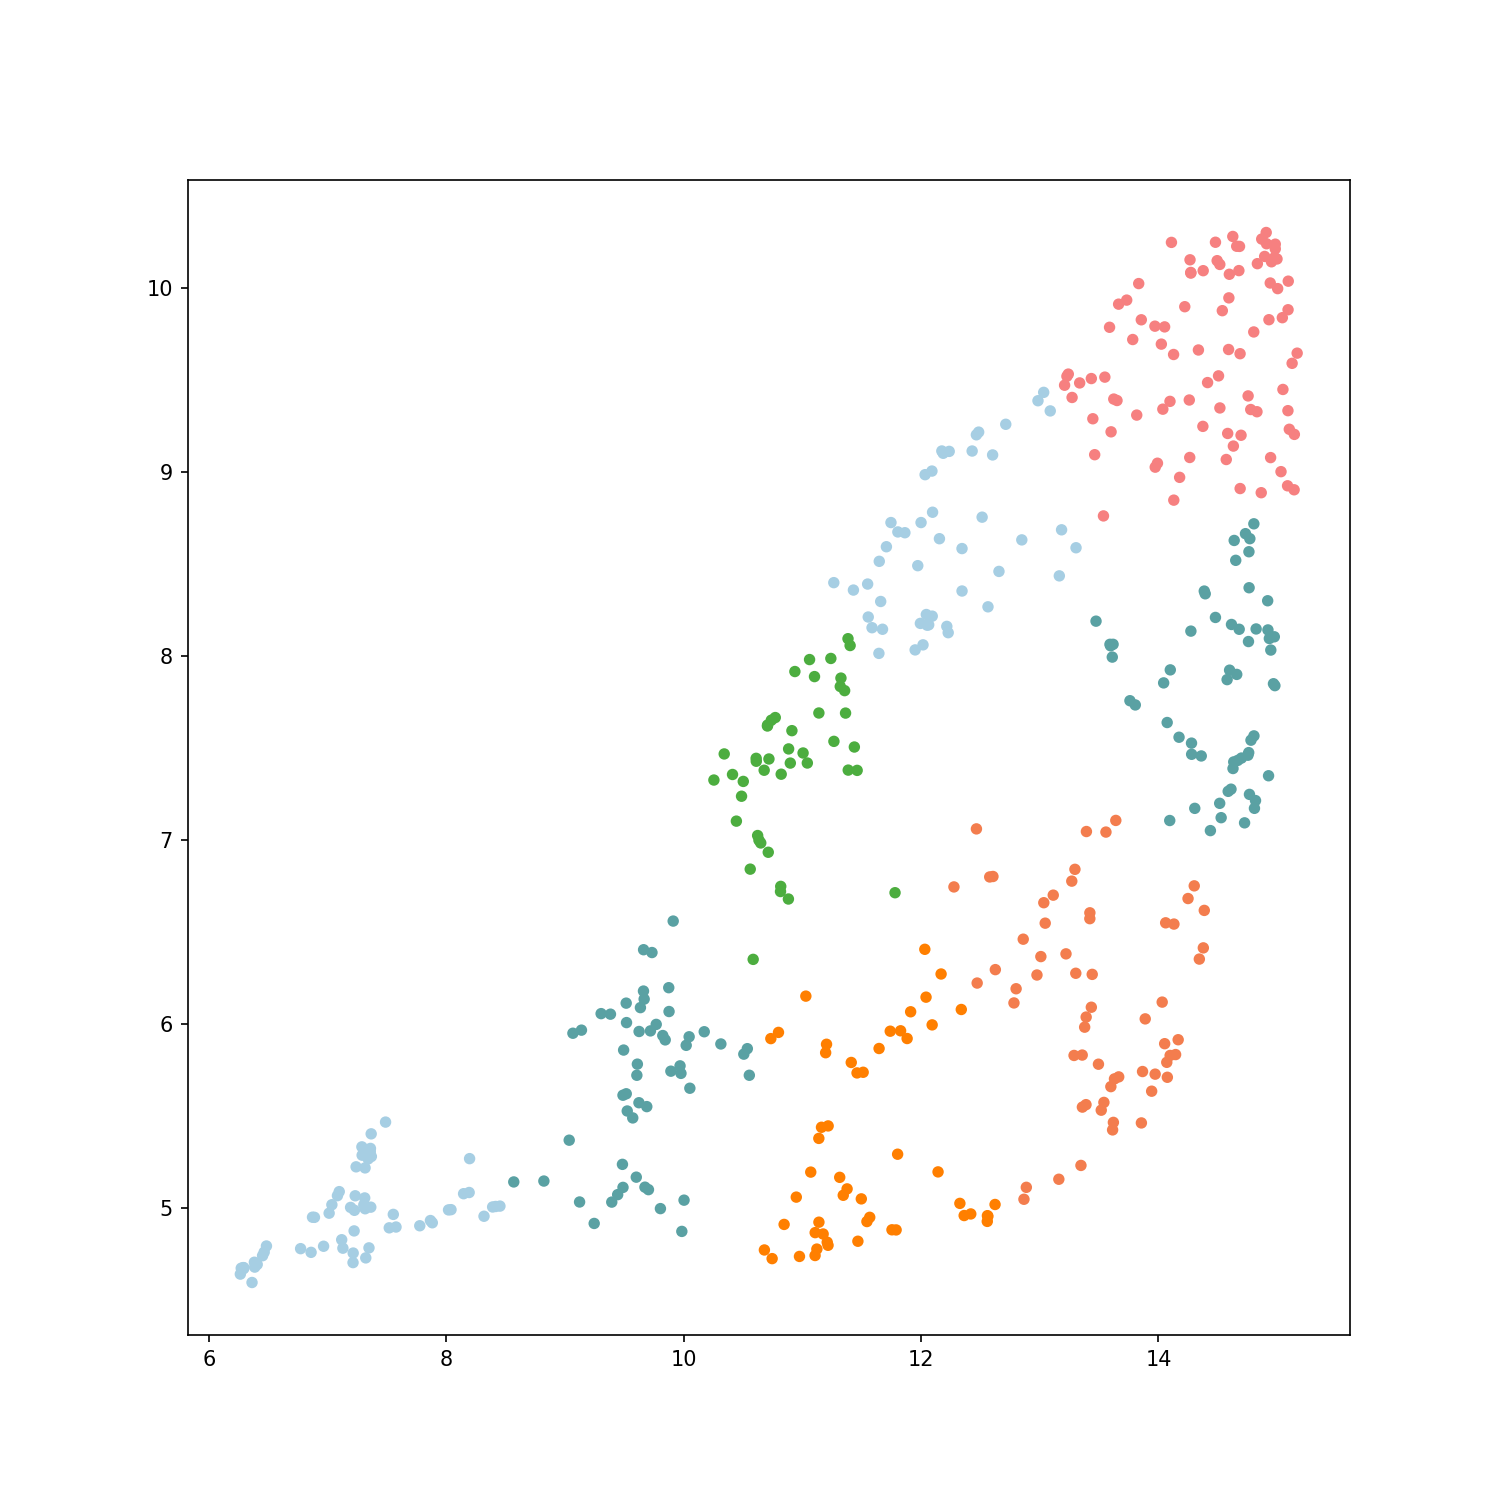

<IPython.core.display.Javascript object>


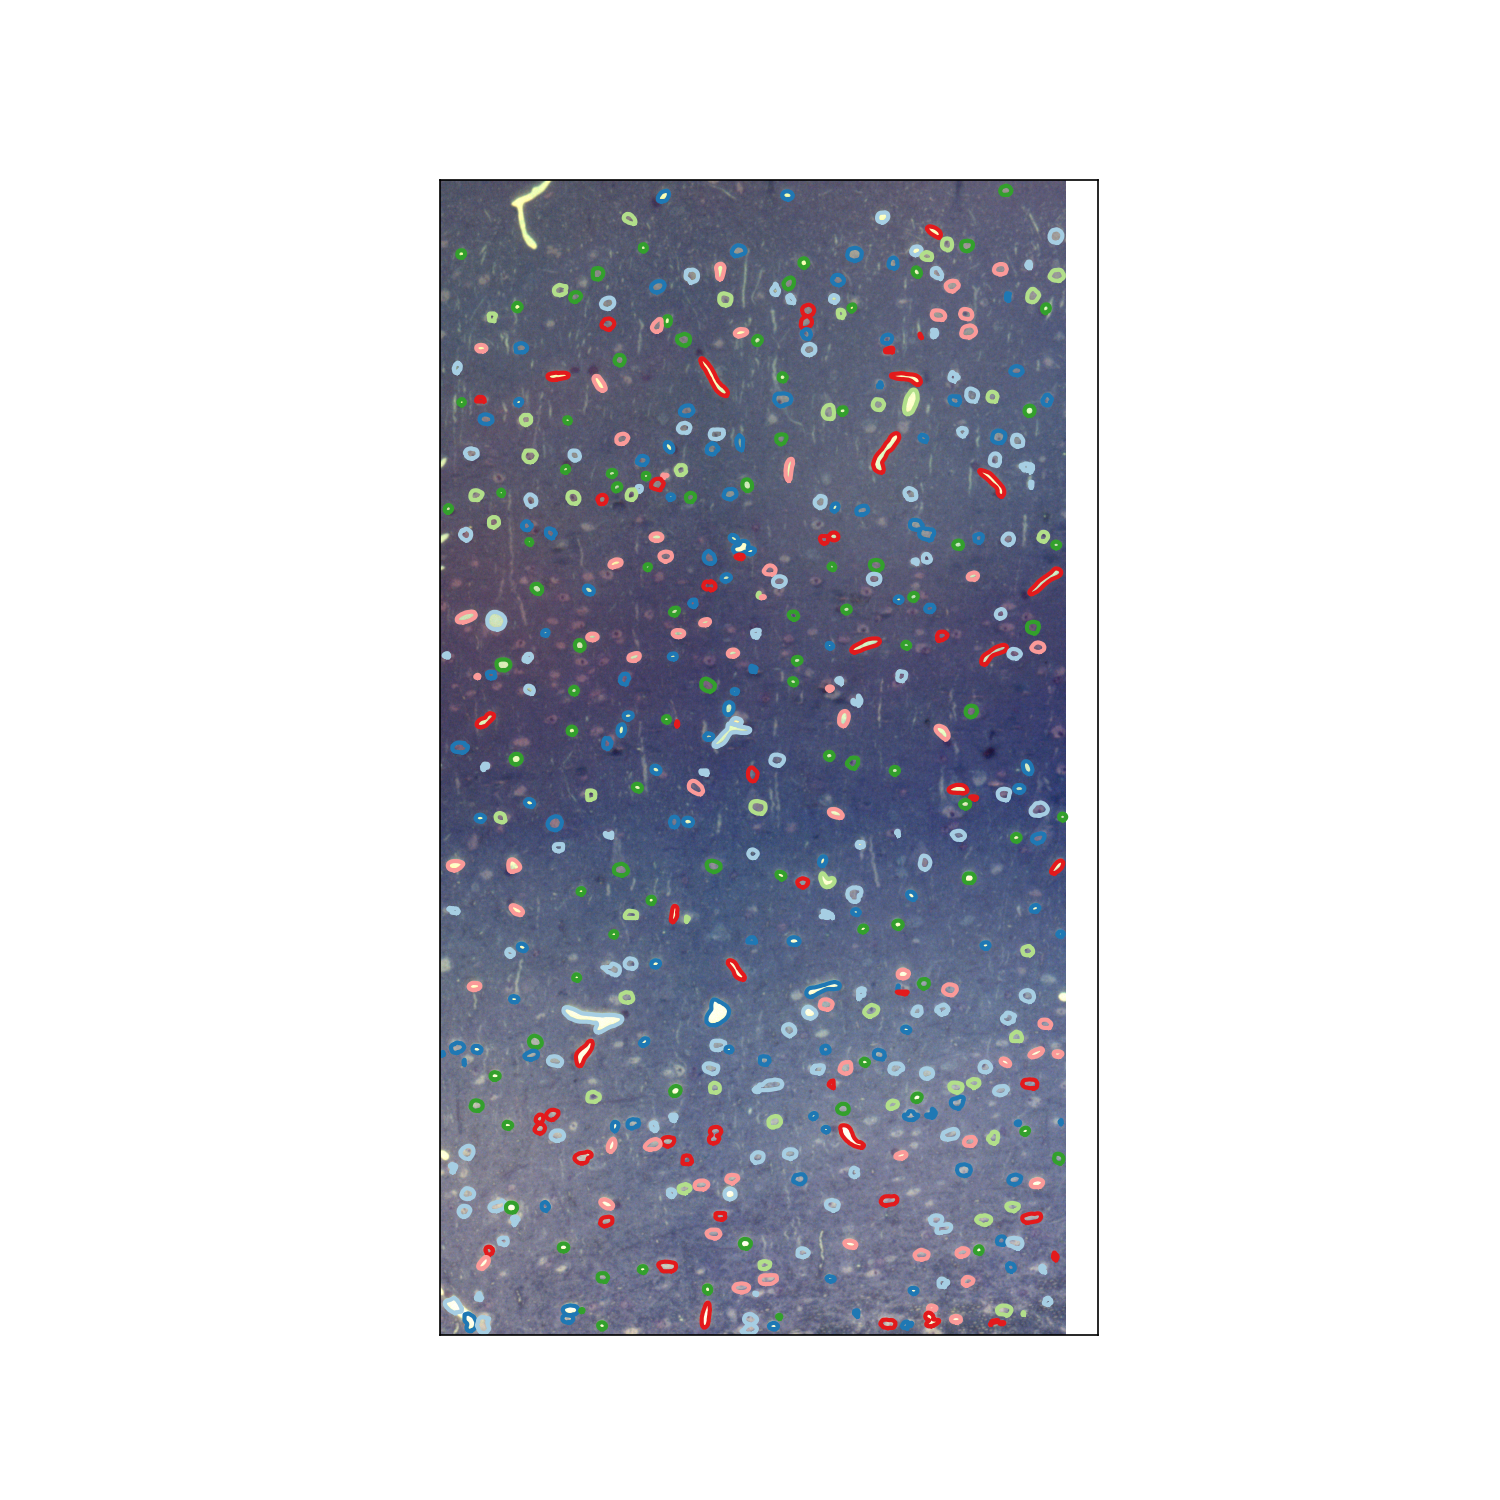

In [ ]:

from palettable.colorbrewer.qualitative import Paired_8

clusterable = umap_result

kmeans  = KMeans(n_clusters=8, random_state=0).fit(clusterable)
labels = kmeans.labels_

#labels = hdbscan.HDBSCAN(
#    min_samples=5,
#    min_cluster_size=20,
#).fit_predict(clusterable)



fig, ax = plt.subplots(figsize=(10,10))
colormap = Paired_6.mpl_colors


plt.scatter(clusterable[:, 0],
            clusterable[:, 1],
            c=(labels)%6,
            s=20.0,
           cmap=Paired_8.mpl_colormap);
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
oname = 'Mouse5-crop.png'

img = Image.open(oname)
ax.imshow(img, cmap=plt.cm.gray)

for n, contour in enumerate(cont_filt):
    col = colormap[(labels[n])%6]
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color = col)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])


plt.show()

<IPython.core.display.Javascript object>


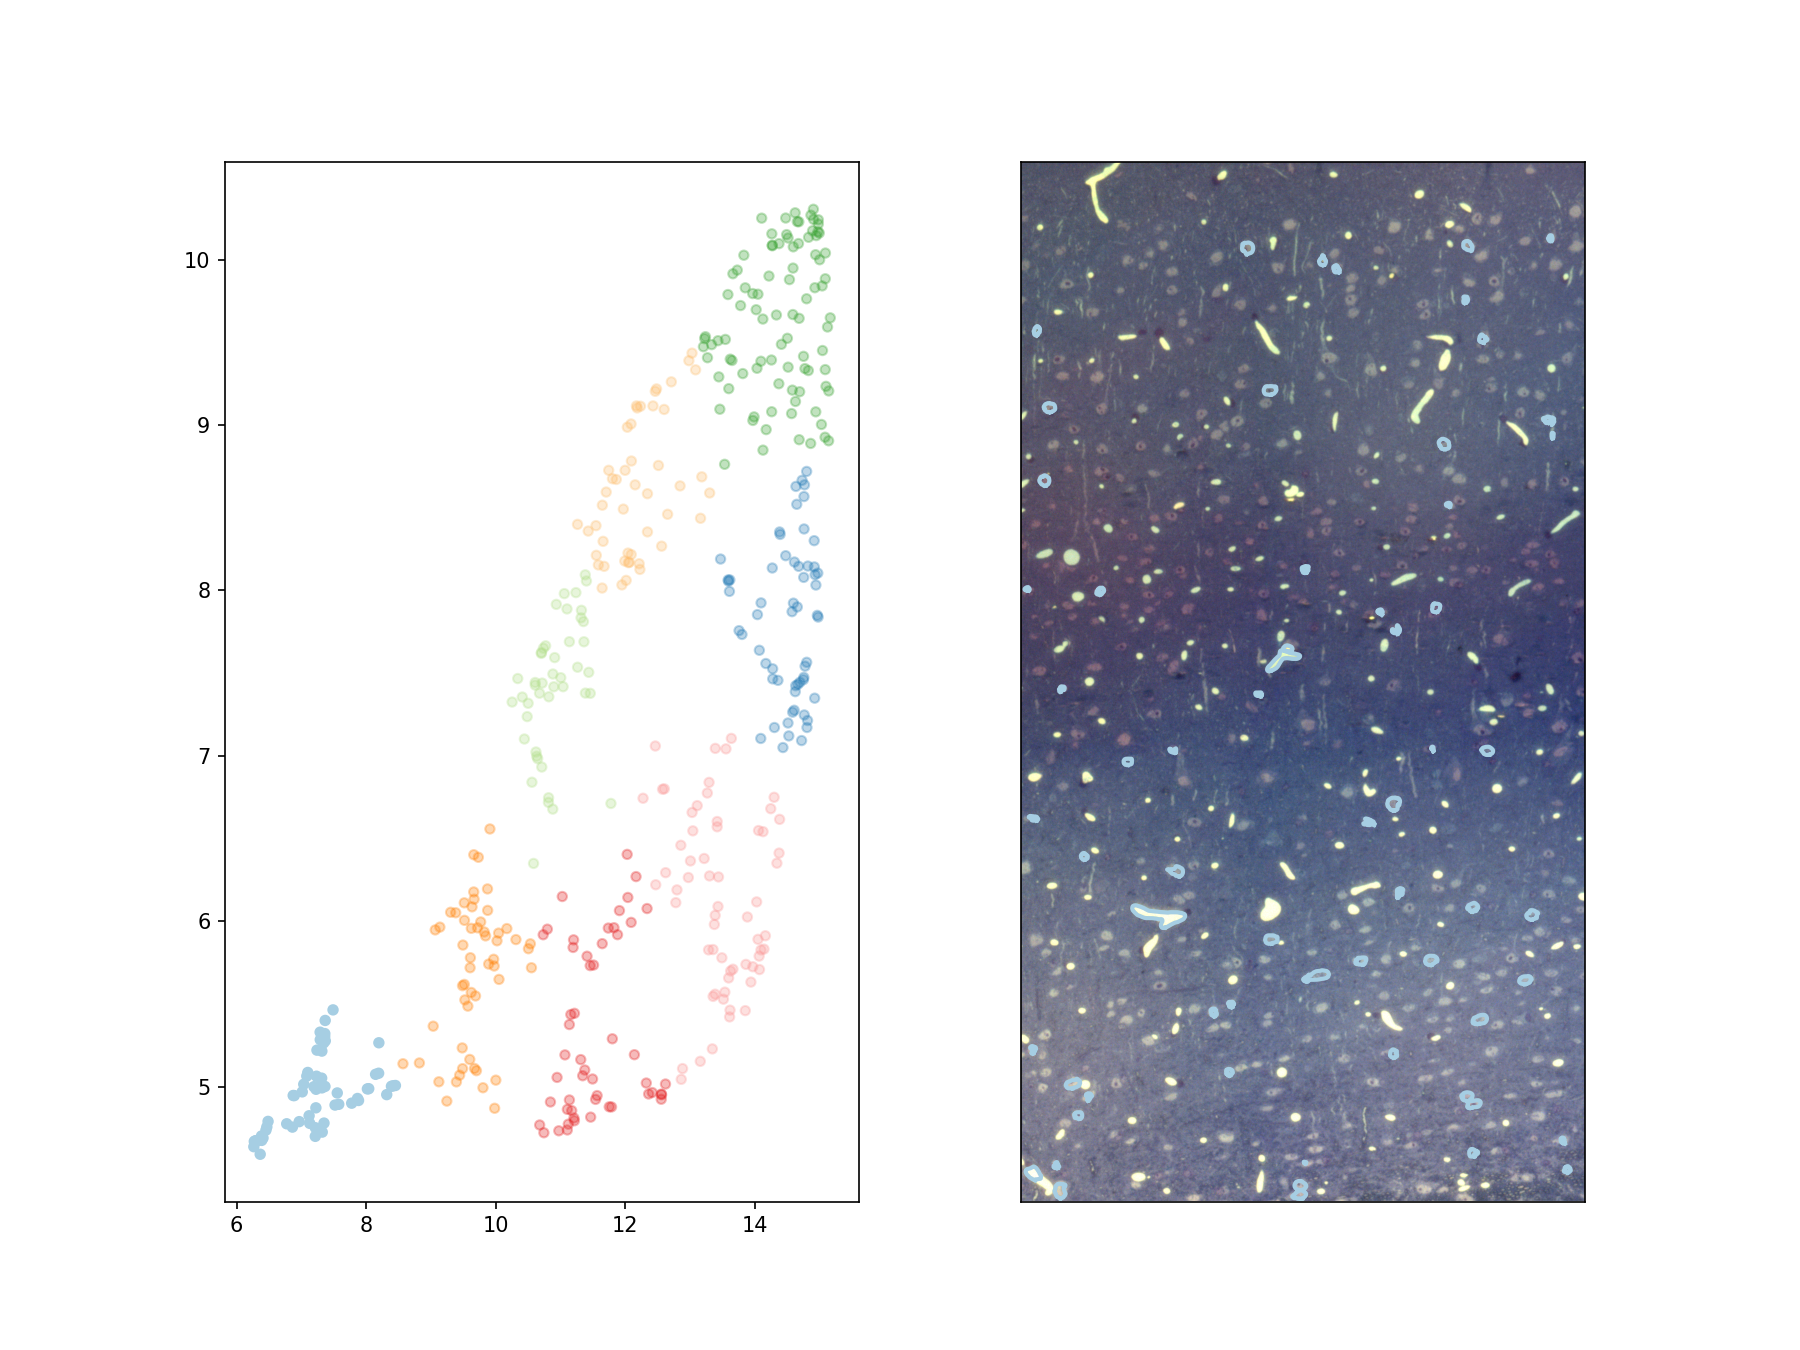

In [ ]:
from palettable.colorbrewer.qualitative import Paired_8
#from matplotlib.widgets  import RectangleSelector


%matplotlib notebook

lbl=labels 
colormap = Paired_8.mpl_colors

fig, (ax, ax1) = plt.subplots(1, 2,figsize=(12,9))

coll=ax.scatter(clusterable[:, 0],
            clusterable[:, 1],
            c=labels+1,
            s=20.0,
            cmap=Paired_8.mpl_colormap,
            label='dataset',
            picker = True);

flag=False
colors= []

xdata = clusterable[:,0]
ydata = clusterable[:,1]

def on_pick(event):
    global flag
    global colors

    if flag==False :
        flag=True
        colors= coll._facecolors.copy() 

    for i in range(0,len(clusterable[:, 0])):
        if lbl[event.ind[0]]==lbl[i]:
            coll._facecolors[i,:] = colors[i,:] #(1, 0, 0, 1)
        else:
            coll._facecolors[i,:] = colors[i,:]
            coll._facecolors[i,3] = 0.3
    plotContours(lbl=lbl[event.ind[0]])
    fig.canvas.draw()

def plotContours(lbl=0):
    ax1.clear()
    ax1.imshow(img, cmap=plt.cm.gray)
    for n, contour in enumerate(smoothed_contours):
        if labels[n]==lbl:
            ax1.plot(contour[:, 1], contour[:, 0], linewidth=2, color =  colormap[labels[n]])
            
    ax1.axis('image')
    ax1.set_xticks([])
    ax1.set_yticks([])

def plot_contours(selected,ax,contour):
    ax.clear()
    ax.imshow(img, cmap=plt.cm.gray)
    for n in selected:
        ax.plot(contour[n, 1], contour[n, 0], linewidth=2, color =  colormap[labels[n]])
    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
        
    
    
fig.canvas.mpl_connect('pick_event', on_pick);

fname = oname # 'C:/Users/khale/Downloads/monuseg-out/TCGA-38-6178-01Z-00-DX1.png'

img = Image.open(fname)
ax1.imshow(img, cmap=plt.cm.gray)

for n, contour in enumerate(cont_filt):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2, color =  colormap[labels[n]])

ax1.axis('image')
ax1.set_xticks([])
ax1.set_yticks([])
plt.show(block=True)